# CH1 Tidy Data以及基本的文字處理(中文)

## 一、套件說明
* Pandas: 一個資料分析的函式庫，提供了DataFrame等資料格式，與資料處理的函數。
* jieba: 中文斷詞套件
* wordcloud: 文字雲繪圖工具。
* matplotlib: 繪圖工具。

In [1]:
import pandas as pd
import jieba
from wordcloud import WordCloud # pip install wordcloud
from tkinter import font

import matplotlib.pyplot as plt
FontPath = './SimHei.ttf' # 設定字型
plt.rcParams['font.sans-serif'] = ['SimHei']

## 二、文字處理基本流程
接下來的章節我們將介紹文字處理的基本流程。其中大概可以分為六個步驟

* 資料蒐集: 如同上面所述，文字型資料被視為是一種非結構化的資料。其資料來源相當的廣泛，如：論壇、新聞網、社群媒體、專利、論文等...。其中，論壇、新聞網、社群媒體這類由使用者所產生出來的資料我們將其稱為User Generated Data(UGC)，通常來說，我們會使用網路爬蟲的技術來取得這樣的資料(網路爬蟲的技術不會在此範例中討論)。
* 資料初步清理: 將文字內容轉為正規的語句，例如：去除特定標籤、符號、統一標點符號的使用等等
* 斷句斷詞: 使用工具區隔文章中不同的句子、詞彙
* 去除停用字: 停用字就是與分析無關的詞彙，甚至這些詞彙可能會影響分析的結果。因此我們必須在資料處理的過程中將其排除。例如：語助詞
* 產生結構化資料: 根據需求產生不同結構化資料(Tidy Data)，以供後續分析使用。
* 應用更多分析: 進行不同的分析，例如：情緒分析、詞頻分析

## 1. 資料蒐集
網路爬蟲的技術不會在此範例中討論，在後續的範例中，我們將使用以爬取下來的PTT的文章來說明文字分析的技術。

讀取ptt檔案ptt_articleMetaData_0331

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,"首先,要說雙北也可以 台北市+新北市\n\nbtw,台北縣就台北縣 硬改名叫啥新北市,真是無..."
1,Re:[問卦]該接家業嗎？,2021/3/10,00:14:33,https://www.ptt.cc/bbs/Gossiping/M.1615335276....,foreverthink,Gossiping,1,0,0,接啊\n\n然後花點錢裝潢一下\n\n做過觀光工廠景點\n\n然後改名很潮的XXX工作室\n...
2,[問卦]共產主義是不是已經變質？,2021/3/10,04:05:29,https://www.ptt.cc/bbs/Gossiping/M.1615349131....,s72005ming,Gossiping,48,22,5,中國共產黨信奉的共產主義是不是已經變質？\n\n現在實施什麼中國特色的社會主義\n\n跟共產...
3,Re:[問卦]烏克蘭不少人的母語是俄語的八卦,2021/3/10,09:26:39,https://www.ptt.cc/bbs/Gossiping/M.1615368401....,l81311i,Gossiping,28,15,0,笑死我了\n龍吟這個半桶水響叮噹也敢自稱懂歷史\n一堆似是而非的內容\n也敢大放厥詞\n\n...
4,[問卦]爭鮮除了鮭魚是不是沒東西吃了,2021/3/10,10:40:11,https://www.ptt.cc/bbs/Gossiping/M.1615372814....,aynmeow,Gossiping,20,8,2,安安\n\n阿肥我在爭鮮啦\n\n吃了7盤快飽\n\n其中4盤是鮭魚\n\n沒錯\n\n除了...
...,...,...,...,...,...,...,...,...,...,...
1804,[問卦]欸欸都進來幫選晚餐,2021/3/30,09:02:17,https://www.ptt.cc/bbs/Gossiping/M.1617094940....,krit1009,Gossiping,15,6,0,雞肉飯 麥當勞 義大利麵 涼麵\n鐵路便當 牛肉麵 素食餐廳 火鍋\n\n五花馬 周胖子 八...
1805,[新聞]高雄還有14人是「鮭魚」名超長32字的他,2021/3/30,09:13:42,https://www.ptt.cc/bbs/Gossiping/M.1617095625....,youhow0418,Gossiping,52,37,2,高雄還有14人是「鮭魚」名 超長32字的他還沒改回來！\n\nETtoday新聞雲 20...
1806,Re:[爆卦]在中工作，高薪金領張惟晴被網暴台諜台獨,2021/3/30,09:15:39,https://www.ptt.cc/bbs/Gossiping/M.1617095741....,lkklee123,Gossiping,8,5,0,精神分裂的覺青被抓包 她被起底一邊在微博捧祖國\n一邊在FB辱華 這樣子過了十二年不知道是覺...
1807,[問卦]鮭魚想回游但是運河塞住了怎麼辦,2021/3/30,12:49:48,https://www.ptt.cc/bbs/Gossiping/M.1617108590....,gyGirl,Gossiping,12,2,1,聽說我朋友是條鮭魚啦\n\n最近想要回游\n\n但是說運河好像已經塞住了\n\n該怎麼辦呢\n


## 2. 資料初步清理
清除內文為空值的文章<br>
透過觀察發現ptt的文章常用兩個換行符號作為句子的結尾，因此將兩個換行取代為句號，並清除不重要的字如換行、網址

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,"首先,要說雙北也可以 台北市+新北市。btw,台北縣就台北縣 硬改名叫啥新北市,真是無聊的大..."
1,Re:[問卦]該接家業嗎？,2021/3/10,00:14:33,https://www.ptt.cc/bbs/Gossiping/M.1615335276....,foreverthink,Gossiping,1,0,0,接啊。然後花點錢裝潢一下。做過觀光工廠景點。然後改名很潮的XXX工作室。最好樣幾隻小貓貓，小...
2,[問卦]共產主義是不是已經變質？,2021/3/10,04:05:29,https://www.ptt.cc/bbs/Gossiping/M.1615349131....,s72005ming,Gossiping,48,22,5,中國共產黨信奉的共產主義是不是已經變質？。現在實施什麼中國特色的社會主義。跟共產主義根本相差...
3,Re:[問卦]烏克蘭不少人的母語是俄語的八卦,2021/3/10,09:26:39,https://www.ptt.cc/bbs/Gossiping/M.1615368401....,l81311i,Gossiping,28,15,0,笑死我了龍吟這個半桶水響叮噹也敢自稱懂歷史一堆似是而非的內容也敢大放厥詞。我來跟大家說明斯拉...
4,[問卦]爭鮮除了鮭魚是不是沒東西吃了,2021/3/10,10:40:11,https://www.ptt.cc/bbs/Gossiping/M.1615372814....,aynmeow,Gossiping,20,8,2,安安。阿肥我在爭鮮啦。吃了7盤快飽。其中4盤是鮭魚。沒錯。除了鮭魚其他都難吃。不懂那些拿鮪魚...
...,...,...,...,...,...,...,...,...,...,...
1804,[問卦]欸欸都進來幫選晚餐,2021/3/30,09:02:17,https://www.ptt.cc/bbs/Gossiping/M.1617094940....,krit1009,Gossiping,15,6,0,雞肉飯 麥當勞 義大利麵 涼麵鐵路便當 牛肉麵 素食餐廳 火鍋。五花馬 周胖子 八方 四海燒...
1805,[新聞]高雄還有14人是「鮭魚」名超長32字的他,2021/3/30,09:13:42,https://www.ptt.cc/bbs/Gossiping/M.1617095625....,youhow0418,Gossiping,52,37,2,高雄還有14人是「鮭魚」名 超長32字的他還沒改回來！。ETtoday新聞雲 2021年...
1806,Re:[爆卦]在中工作，高薪金領張惟晴被網暴台諜台獨,2021/3/30,09:15:39,https://www.ptt.cc/bbs/Gossiping/M.1617095741....,lkklee123,Gossiping,8,5,0,精神分裂的覺青被抓包 她被起底一邊在微博捧祖國一邊在FB辱華 這樣子過了十二年不知道是覺醒了...
1807,[問卦]鮭魚想回游但是運河塞住了怎麼辦,2021/3/30,12:49:48,https://www.ptt.cc/bbs/Gossiping/M.1617108590....,gyGirl,Gossiping,12,2,1,聽說我朋友是條鮭魚啦。最近想要回游。但是說運河好像已經塞住了。該怎麼辦呢


## 3. 斷句
中文主要以標點符號進行斷句，並清除空的字串

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,"首先,要說雙北也可以 台北市+新北市"
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,"btw,台北縣就台北縣 硬改名叫啥新北市,真是無聊的大人理由.."
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,"雖然窩是台北人,可是要談台北市有啥""特色""美食 .. .."
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,"還真的沒有=="""
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,蚵仔煎 滷肉飯 北部粽(>南部粽) 麵線 等等 到處都有阿
...,...,...,...,...,...,...,...,...,...,...
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,如題
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,查一下發現彰化田中以前就叫做田中央
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,其實字面意思沒差吧
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,為什麼要把最後那個字改掉


## 4. 斷詞
斷詞引擎設定：使用 Jieba 當作斷詞系統。
Jieba原先內建為簡體字字典，但我們可以使用繁體字典來做為替換，結果會比較好。另外可能還有一些專有名詞是沒有被包含在預設字典當中，我們也可以使用自定義字典的方式加入，或者使用參數的形式帶入。

In [5]:
# 初始化斷詞引擎：不一定要設定，只使用內建效果也可以
# 參考網址：https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt


斷詞前先將標點符號清除，並清除空字串

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,首先 要說雙北也可以 台北市 新北市
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,btw 台北縣就台北縣 硬改名叫啥新北市 真是無聊的大人理由
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,雖然窩是台北人 可是要談台北市有啥 特色 美食
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,還真的沒有
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,蚵仔煎 滷肉飯 北部粽 南部粽 麵線 等等 到處都有阿
...,...,...,...,...,...,...,...,...,...,...
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,如題
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,查一下發現彰化田中以前就叫做田中央
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,其實字面意思沒差吧
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,為什麼要把最後那個字改掉


使用jieba進行斷詞

Building prefix dict from /home/tzuting98914/2022_training/dict.txt ...
Loading model from cache /tmp/jieba.uf07f1c5063a764093f5181ec884fa4e2.cache
Loading model cost 0.308 seconds.
Prefix dict has been built successfully.


,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,word
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,首先
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,雙北
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,可以
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,台北市
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,北市
...,...,...,...,...,...,...,...,...,...,...
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,那個
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,改掉
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,有別
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,用意


## 5.移除停用字

In [8]:
# 以檔案形式匯入通用的停用字檔案


移除dataframe中的停用字

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,word
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,雙北
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,台北市
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,北市
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,btw
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,台北縣
...,...,...,...,...,...,...,...,...,...,...
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,最後
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,改掉
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,有別
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,用意


## 6. 計算詞頻

,freq,word
0,3165,鮭魚
1,2099,改名
2,1398,壽司
3,1026,名字
4,715,免費
...,...,...
20223,1,將派
20224,1,定期
20225,1,政委
20226,1,廢核


## 7. 視覺化結果

matplotlib 畫圖中文顯示不出來的問題

* Mac : <a href="https://blog.csdn.net/RivenDong/article/details/118990773">參考方式</a>
* Windows : <a href="https://medium.com/marketingdatascience/%E8%A7%A3%E6%B1%BApython-3-matplotlib%E8%88%87seaborn%E8%A6%96%E8%A6%BA%E5%8C%96%E5%A5%97%E4%BB%B6%E4%B8%AD%E6%96%87%E9%A1%AF%E7%A4%BA%E5%95%8F%E9%A1%8C-f7b3773a889b">參考方式</a>
* 暫存查找 path 方式：matplotlib.get_cachedir()

### 繪製詞頻為前10高的長條圖

<AxesSubplot:ylabel='word'>

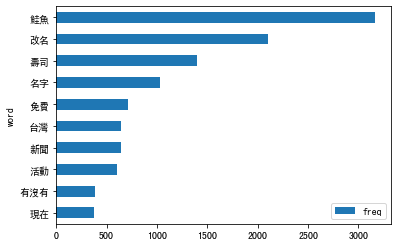

## 8. 更新停用字字典

In [12]:
# 參數形式手動加入停用字


In [13]:
# 重新移除停用字


,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,word
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,雙北
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,台北市
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,北市
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,btw
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,台北縣
...,...,...,...,...,...,...,...,...,...,...
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,最後
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,改掉
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,有別
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,用意


### 重新計算詞頻

,freq,word
0,3165,鮭魚
1,2099,改名
2,1398,壽司
3,1026,名字
4,715,免費
...,...,...
20222,1,將派
20223,1,定期
20224,1,政委
20225,1,廢核


### 重新繪製詞頻長條圖

<AxesSubplot:ylabel='word'>

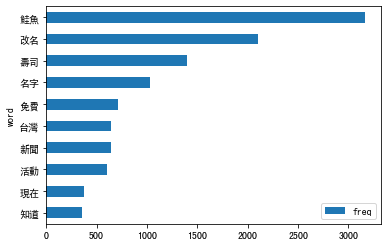

## 9. 更新斷詞字典
更新斷詞字典有兩種方法

a. 自行定義的斷詞字典

In [16]:
# 載入自定義辭典：一個詞一行，每行分詞語、詞頻(可省)、詞性(可省)


b. 參數形式手動加入字詞

### 重新斷詞

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,word
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,首先
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,雙北
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,可以
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,台北市
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,北市
...,...,...,...,...,...,...,...,...,...,...
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,那個
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,改掉
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,有別
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,用意


### 重新移除停用字

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,word
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,雙北
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,台北市
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,北市
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,btw
0,[問卦]怎麼介紹台北的特色美食?,2021/3/9,17:24:58,https://www.ptt.cc/bbs/Gossiping/M.1615310700....,Emerson158,Gossiping,18,8,3,台北縣
...,...,...,...,...,...,...,...,...,...,...
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,最後
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,改掉
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,有別
1808,[問卦]田中央為什麼要改名?,2021/3/30,12:53:17,https://www.ptt.cc/bbs/Gossiping/M.1617108799....,skn60694,Gossiping,22,13,0,用意


### 重新計算詞頻

,freq,word
0,2870,鮭魚
1,2099,改名
2,1026,名字
3,672,壽司
4,658,壽司郎
...,...,...
20196,1,郭慶霖
20197,1,核一
20198,1,核二
20199,1,核三


### 重新繪製詞頻長條圖

<AxesSubplot:ylabel='word'>

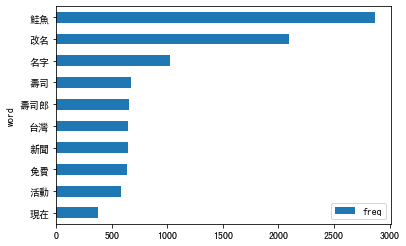

### 繪製前100個字的文字雲

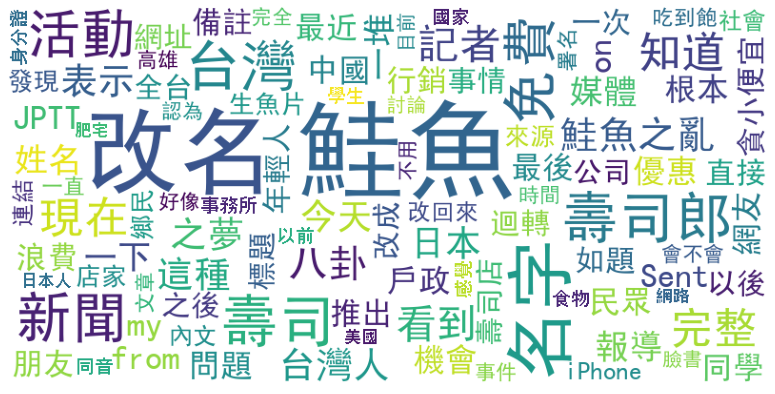